In [1]:
import gym
from gym import spaces
import numpy as np
from pprint import pprint
from typing import Tuple, Dict, Optional, Iterable

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
class TicTacToe(gym.Env):
    def __init__(self) -> None:
        super().__init__()
        self.board = self._setBoard() # THE CURRENT STATE IS THE BOARD
        self.turn = 1 # Player ones turn by default
        self.players = [1,-1]
        self.total_turns = 0
        self.action_space = spaces.MultiDiscrete([3,3])
        self.observation_space = spaces.Discrete(362880) #there are 9 factorial possible states, self.board stores current state
        self.winner = None

    def step(self, player: int , action: Tuple[int,int]):
        info = {"winner":0}
        reward = 0
        if action[0] not in [0,1,2] or action[1] not in [0,1,2]:
            raise ValueError(f"Incorrect Move {action}, player must move within the board\n{self.board}")
        if player not in [1,-1]:
            raise ValueError(f"Incorrect player {player}, player can only be 1 or -1")
        if self.turn == player:
            if (self._checkValidAction(action)):
                reward = self.compute_reward()
                self.board[action[0],action[1]] = player
                self.turn = -player
                self.total_turns+=1

        else:
            print(f"it is {'p1' if self.turn==1 else 'p2'}'s turn")

        if (self.checkEnd()==1 or self.checkEnd()==-1):
            done = True
            info["winner"] = self.checkEnd()
        elif (self.checkEnd()==100):
            done = True
            info["winner"] = "draw"
        else:
            done = False

        return (self.turn, reward, done, info) 


    def compute_reward(self,):
        if self.checkEnd()==1:
            reward = 100
        elif self.checkEnd()==-1:
            reward = 100
        else:
            reward = 0
        return reward

    def _checkValidAction(self,action: Tuple[int,int]):
        if (self.board[action[0],action[1]]!=0):
            print(f"{action} already filled by {'p1' if self.board[action[0],action[1]]==1 else 'p2'}")
            return False
        return True


    def checkEnd(self) -> bool: # Can also use sum of the rows/cols/diagonals = 3 or -3 to judge winner
        p1_win = np.ones(3)
        p2_win = np.ones(3) * -1
    
        for i in range(3):
            if (np.array_equal(self.board[i], p1_win)):
                self.winner="p1"
                return 1
            elif (np.array_equal(self.board[i], p2_win)):
                self.winner="p2"
                return -1
            
        for j in range(3): 
            t=[]
            for i in range(3):
                t.append(self.board[i,j])
            t = np.array(t)
            if (np.array_equal(t,p1_win)):
                self.winner="p1"
                return 1
            elif (np.array_equal(t,p2_win)):
                self.winner="p2"
                return -1
            
        t = np.array([self.board[0,0], self.board[1,1], self.board[2,2]])
        if (np.array_equal(t, p1_win)):
            self.winner="p1"
            return 1
        elif (np.array_equal(t,p2_win)):
            self.winner="p2"
            return -1
        
        t = np.array([self.board[0,2], self.board[1,1], self.board[2,0]])
        if (np.array_equal(t, p1_win)):
            self.winner="p1"
            return 1
        elif (np.array_equal(t,p2_win)):
            self.winner="p2"
            return -1
        
        if self.board.all():
            return 100 #means Draw

        return 0 #means game is not over

    def reset(self,) -> int:
        self.turn = 1
        self.board = self._setBoard()
        return self.turn

    @staticmethod
    def _setBoard():
        return np.zeros([3,3])
    
    def render(self, mode="human"):
        return super().render(mode)
    
    def printBoard(self,):
        plt.title(f"{self.winner}")
        plt.imshow(self.board)
        plt.show()


    

In [4]:
env = TicTacToe()

print(env.board)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


[2 0] already filled by p1
[1 2] already filled by p1
[1 1] already filled by p2
[1 2] already filled by p1
[1 1] already filled by p2
[1 1] already filled by p2
[2 0] already filled by p1
[1 1] already filled by p2
[2 0] already filled by p1
[0 0] already filled by p1
[0 1] already filled by p2
[0 1] already filled by p2
{'winner': 1}
[[ 1. -1. -1.]
 [-1. -1.  1.]
 [ 1.  1.  1.]]


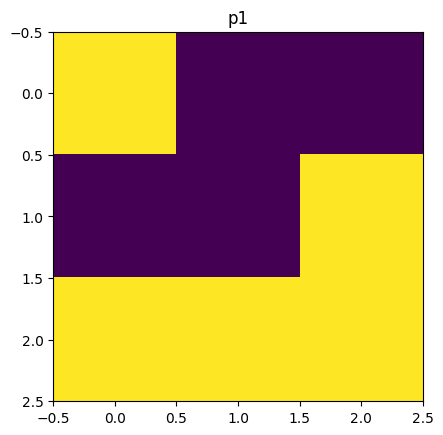

In [13]:
def test(env):
    turn = env.reset()
    
    done = False

    while not done:
        action = env.action_space.sample()
        next_turn, reward, done, extra_info = env.step(turn, action)

        turn = next_turn
    
    print(extra_info)

test(env)
print(env.board)
env.printBoard()
    

In [27]:
env.reset()
env.step(1, (1,1))
env.step(-1, (1,0))
env.step(1, (2,2))
env.step(-1, (0,1))
env.step(1, (0,0))
env.step(-1, (2, 0))

(1, 100, True, {'winner': 1})